In [3]:
import pandas as pd
import statsmodels.api as sm
data=pd.read_excel('...')
x,y=data.iloc[:,0],data.iloc[:,-1]
x=sm.add_constant(x)
model=sm.Logit(y,x)
results=model.fit()
print(results.summary())

PermissionError: [Errno 13] Permission denied: '...'

In [4]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.90e-08
Time:                        18:10:06   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [5]:
import numpy as np

# 定义一个简单的线性回归模型
def linear_model(x, w):
    return np.dot(x, w)

# 定义损失函数（均方误差）
def mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# 随机生成一些训练数据
np.random.seed(0)
X = np.random.rand(1000, 1)  # 100个样本，每个样本有1个特征
y = 3 * X.squeeze() + 2 + np.random.randn(1000) * 0.1  # 真实的权重是3，偏置是2

# 添加偏置项
X = np.hstack([X, np.ones((X.shape[0], 1))])

# 初始化权重
w = np.zeros(X.shape[1])

# 设置学习率和迭代次数
learning_rate = 0.5
iterations = 100

# 批量梯度下降
for i in range(iterations):
    y_pred = linear_model(X, w)
    gradient = -2 * np.dot(X.T, y - y_pred) / X.shape[0]
    w -= learning_rate * gradient
print("Batch GD weights:", w)

# 随机梯度下降
w = np.zeros(X.shape[1])
for i in range(iterations):
    for j in range(X.shape[0]):
        y_pred = linear_model(X[j], w)
        gradient = -2 * (y[j] - y_pred) * X[j]
        w -= learning_rate * gradient
print("SGD weights:", w)

# 小批量梯度下降
w = np.zeros(X.shape[1])
batch_size = 10
for i in range(iterations):
    indices = np.random.choice(X.shape[0], batch_size, replace=False)
    X_mini_batch = X[indices]
    y_mini_batch = y[indices]
    y_pred = linear_model(X_mini_batch, w)
    gradient = -2 * np.dot(X_mini_batch.T, y_mini_batch - y_pred) / batch_size
    w -= learning_rate * gradient
print("Mini-batch GD weights:", w)


Batch GD weights: [2.98881054 2.00850628]
SGD weights: [3.140668   2.06542088]
Mini-batch GD weights: [3.01017806 2.04867575]


In [6]:
# FFT
import numpy as np
from scipy.fft import fft

# Generate a signal
x = np.linspace(0, 1, 500, endpoint=False)
y = np.cos(2 * np.pi * 7 * x) + np.sin(2 * np.pi * 13 * x)

# Apply FFT
yf = fft(y)

# Machine Learning (using scikit-learn)
from sklearn.svm import SVC
# Feature extraction (just an example, you'd usually use more features)
features_1 = np.abs(yf[:10])
features_2 = np.abs(yf[10:20])

# Labels
labels = [0, 1]  # Now we have two classes

# Train model
clf = SVC()
clf.fit([features_1, features_2], labels)



NameError: name 'features' is not defined

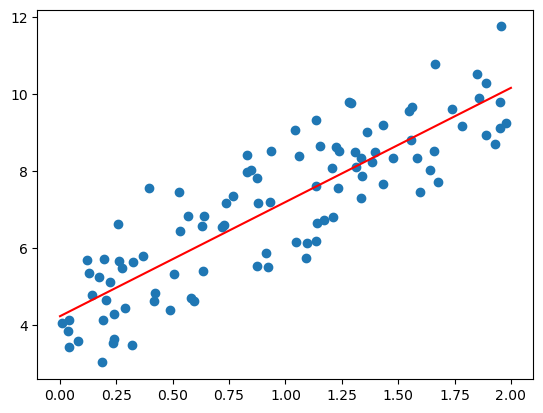

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 生成随机数据
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# 添加x0 = 1到每一个样本
X_b = np.c_[np.ones((100, 1)), X]

# 使用正规方程求解
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# 生成测试数据
X_new = np.array([[0], [2]])

# 添加x0 = 1
X_new_b = np.c_[np.ones((2, 1)), X_new]

# 进行预测
y_predict = X_new_b.dot(theta_best)
# 绘制模型
plt.scatter(X, y)
plt.plot(X_new, y_predict, "r-")
plt.show()

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 创建一个复杂的数据集
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练未剪枝的模型
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy of unpruned tree: {accuracy_score(y_test, y_pred)}")

# 创建并训练剪枝后的模型
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)
y_pred_pruned = clf_pruned.predict(X_test)
print(f"Accuracy of pruned tree: {accuracy_score(y_test, y_pred_pruned)}")



Accuracy of unpruned tree: 0.875
Accuracy of pruned tree: 0.865


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 加载数据并分割
iris = load_iris()
X, y = iris.data[:, :2], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 独热编码
y_train_onehot = np.eye(3)[y_train]

# 初始化参数
input_size = 2
hidden_size = 5
output_size = 3
lr = 0.01

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# 定义激活函数和它的导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 训练模型
for epoch in range(100000):
    # 前向传播
    hidden_layer_input = np.dot(X_train, W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    output = sigmoid(output_layer_input)

    # 计算误差
    error = y_train_onehot - output
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")

    # 反向传播
    output_gradient = error * sigmoid_derivative(output)
    hidden_layer_error = output_gradient.dot(W2.T)
    hidden_layer_gradient = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    # 更新权重和偏置
    W2 += hidden_layer_output.T.dot(output_gradient) * lr
    b2 += np.sum(output_gradient, axis=0, keepdims=True) * lr
    W1 += X_train.T.dot(hidden_layer_gradient) * lr
    b1 += np.sum(hidden_layer_gradient, axis=0, keepdims=True) * lr

# 测试模型
hidden_layer_input = np.dot(X_test, W1) + b1
hidden_layer_output = sigmoid(hidden_layer_input)
output_layer_input = np.dot(hidden_layer_output, W2) + b2
output = sigmoid(output_layer_input)
predictions = np.argmax(output, axis=1)

print(f"Test Accuracy: {np.mean(predictions == y_test)}")

# 可视化
# ...（与上一个例子中的可视化代码相同）


Epoch 0, Error: 0.47205712019275226
Epoch 1000, Error: 0.24626945793358068
Epoch 2000, Error: 0.22913478166429604
Epoch 3000, Error: 0.21779273836014362
Epoch 4000, Error: 0.21054958360991732
Epoch 5000, Error: 0.20618603993843365
Epoch 6000, Error: 0.20297992845180732
Epoch 7000, Error: 0.19972620684609624
Epoch 8000, Error: 0.1971087350098344
Epoch 9000, Error: 0.1950252688883825
Epoch 10000, Error: 0.19334300148318093
Epoch 11000, Error: 0.19196813590699108
Epoch 12000, Error: 0.19082437843203648
Epoch 13000, Error: 0.18984544510342166
Epoch 14000, Error: 0.18898278234374308
Epoch 15000, Error: 0.18820743414827132
Epoch 16000, Error: 0.18750354022147922
Epoch 17000, Error: 0.18686173159849948
Epoch 18000, Error: 0.18627557128863742
Epoch 19000, Error: 0.18574016865206358
Epoch 20000, Error: 0.18525179023510982
Epoch 21000, Error: 0.1848078513101192
Epoch 22000, Error: 0.1844070496128349
Epoch 23000, Error: 0.18404955849678603
Epoch 24000, Error: 0.18373720977874275
Epoch 25000, Erro

Accuracy: 0.3


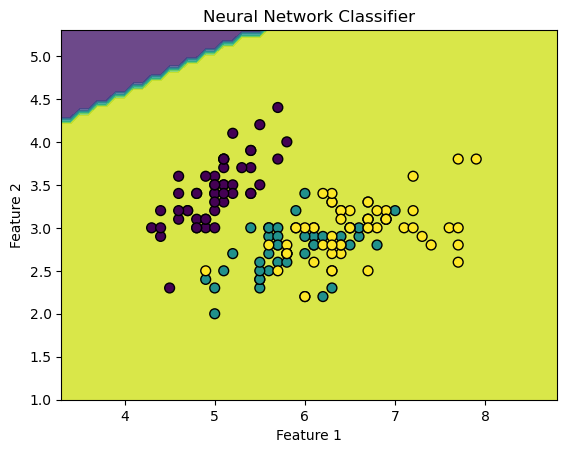

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# 加载数据
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # 只选取前两个特征以便于可视化

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=100000, random_state=42)
mlp.fit(X_train, y_train)

# 预测并评估
y_pred = mlp.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# 可视化
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title("Neural Network Classifier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


210


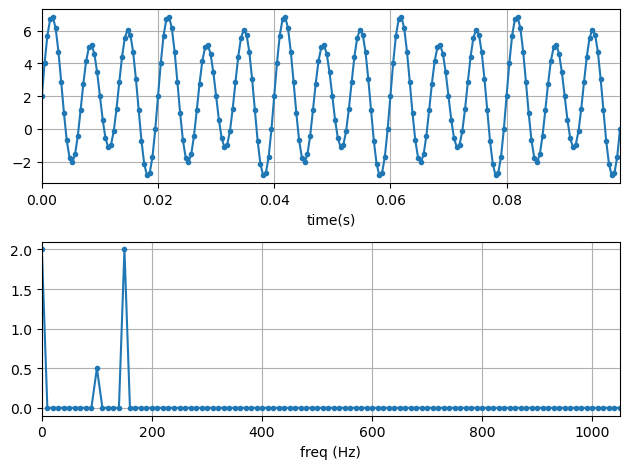

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Fs =2100 #设置采样频率（例如2000 Hz）。
tstep=1/Fs #时间间隔
f0=100 #定义信号频率（例如100 Hz）。

N=int(10* Fs/f0)#计算样本数int必须要加np.linspace 函数的第三个参数必须是整数
print(N)
t=np.linspace(0,(N-1)*tstep,N)
fstep= Fs/N
f=np.linspace(0,(N-1)*fstep,N)

y=1 *np.sin(2*np.pi*f0*t) +4*np.sin(3*np.pi*f0*t) +2

X=np.fft.fft(y)
X_mag=np.abs(X)/N

f_plot = f[0:int(N/2+1)]  # 取Nyquist频率以下的频率数据
X_mag_plot = 2 * X_mag[0:int(N/2+1)]  # 幅度翻倍，因为FFT结果是对称的
X_mag_plot[0] = X_mag_plot[0] / 2  # 直流分量不翻倍

fig,[ax1,ax2]=plt.subplots(nrows=2,ncols=1)
ax1.plot(t,y,'.-')
ax2.plot(f,X_mag,'.-')
ax1.set_xlabel("time(s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

ax1.set_xlim(0,t[-1])
ax2.set_xlim(0,f_plot[-1])
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np,matplotlib.pyplot as plt

Text(0, 0.5, 'Value of x(t)')

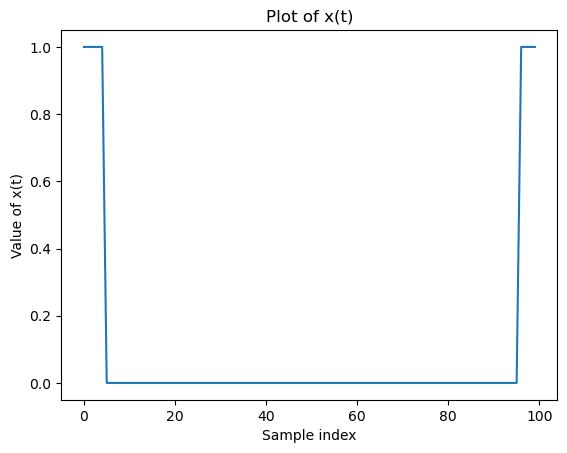

In [ ]:
num_t=100
xt=np.zeros(num_t)
xt[:5]=1
xt[-4:]=1
plt.plot(xt)
plt.title("Plot of x(t)")
plt.xlabel("Sample index")
plt.ylabel("Value of x(t)")

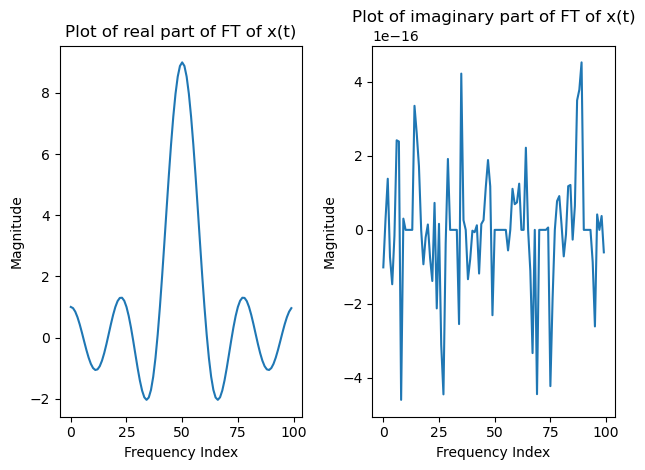

In [ ]:
fxt=np.fft.fft(xt)
#First plot is the real part
plt.subplot(1,2,1)
plt.plot(np.fft.fftshift(np.real(fxt)))
plt.title("Plot of real part of FT of x(t)")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Index")
plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(np.imag(fxt)))
plt.title("Plot of imaginary part of FT of x(t)")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Index")
plt.tight_layout()


偶对称信号（实数）:
如果输入信号是偶对称的，即它满足 f(t)=f(−t)，那么其傅里叶变换将只有实数部分，没有虚数部分。这是因为偶对称信号的傅里叶变换是一个实数的余弦变换，余弦函数是偶函数。
奇对称信号（实数）:
如果输入信号是奇对称的，即它满足 f(t)=−f(−t)，那么其傅里叶变换将只有虚数部分，没有实数部分。这是因为奇对称信号的傅里叶变换是一个纯虚数的正弦变换，正弦函数是奇函数。

从第一个图中可以看出，傅里叶变换的实部显示了一个清晰的模式，这是因为信号中确实存在周期性的组成部分。而第二个图表中虚部的波动应该是由于数值计算的不精确性造成的。这些小的波动实际上是计算机中的数值误差，它们的幅度很小，通常在1e-16这个数量级上，这说明虚部的值实际上是非常接近于零的。在这种尺度下，可以认为虚部实际上就是零。

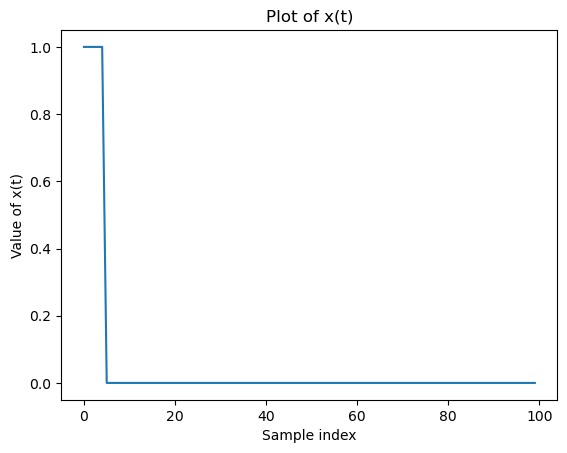

In [ ]:
num_t=100
xt=np.zeros(num_t)
xt[:5]=1
#xt[-4:]=-1
plt.plot(xt)
plt.title("Plot of x(t)")
plt.xlabel("Sample index")
plt.ylabel("Value of x(t)")
fxt=np.fft.fft(xt)

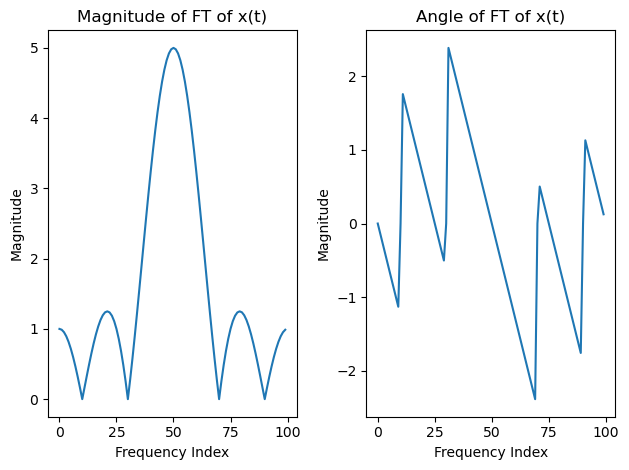

In [ ]:
#Plot in polar form
#First plot is the real part
plt.subplot(1,2,1)
plt.plot(np.fft.fftshift(np.abs(fxt)))
plt.title("Magnitude of FT of x(t)")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Index")
plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(np.angle(fxt)))
plt.title("Angle of FT of x(t)")
plt.ylabel("Magnitude")
plt.xlabel("Frequency Index")
plt.tight_layout()

In [7]:
import struct
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib tk

CHUNK = 1024*4
FORMAT=pyaudio.paInt16
CHANNELS=1
RATE=44100


In [9]:
p=pyaudio.PyAudio()
stream=p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
fig,ax=plt.subplots()

x=np.arange(0,2*CHUNK,2)
line,=ax.plot(x,np.random.rand(CHUNK))
ax.set_xlim(0,CHUNK)
ax.set_ylim(0,255)
while True:
    data=stream.read(CHUNK)
    data_int=np.array(struct.unpack(str(2*CHUNK)+'b',data),dtype='b')[::2]+127
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()

: 

CHUNK：这是一个经常用于描述音频处理中缓冲区大小的术语。在您的代码中， CHUNK 设置为 1024*4 ，这意味着每个块包含 4096 帧。如果您使用单声道音频（一个通道），这意味着每个块将包含 4096 个样本。对于立体声，则为 8192 个样本（每个通道 4096 个）

frames_per_buffer：此参数指定每次流需要音频数据时将从缓冲区读取或写入缓冲区的帧数。将 frames_per_buffer 设置为 CHUNK 意味着 PyAudio 每次从音频输入读取时，都会读取 4096 帧。

FOURIER TRANSFORM IN DIFFERENT TYPES OF FOURIER TRANSFORMS

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft,ifft,fft2,ifft2

In [4]:
t,f=smp.symbols('t,f',real=True)
k=smp.symbols('k',real=True,positive=True)
x=smp.exp(-k*t**2)*k*t
x

k*t*exp(-k*t**2)

fourier_transform 函数是一个来自 SymPy 库的函数，它可以进行符号计算，即保留变量的符号形式，而不是数值形式2。fourier_transform 函数的语法和参数如下：

fourier_transform(f, x, k)：计算函数 f(x) 关于变量 x 的傅里叶变换 F(k)。
f：一个 SymPy 表达式或函数，表示时域信号。
x：一个 SymPy 符号，表示时域变量。
k：一个 SymPy 符号，表示频域变量

from sympy.integrals.transforms import fourier_transform

In [6]:
from sympy.integrals.transforms import fourier_transform
x_FT=fourier_transform(x,t,f)
x_FT

-I*pi**(3/2)*f*exp(-pi**2*f**2/k)/sqrt(k)

Solving Numerically
x=smp.exp(-k *t**2)*smp.sin(k*t)*t**4

In [9]:
from scipy.integrate import quad
def x(t,k):
    return np.exp(-k * t**2) *np.sin(k*t)*t**4
def get_x_FT(x,f,k):
    X_FT_integrand_real = lambda t: np.real(x(t,k)*np.exp(-2*np.pi*1j*f*t))
    X_FT_integrand_comp = lambda t: np.imag(x(t,k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_real =quad(X_FT_integrand_real,-np.inf,np.inf)[0]
    x_FT_comp =quad(X_FT_integrand_comp,-np.inf,np.inf)[0]
    return x_FT_real +1j*x_FT_comp


In [ ]:
f=np.linspace(-4,4,100)
x_FT=np.vectorize(get_x_FT)(x,f,k=2)